In [ ]:
!pip install geopandas
!pip install matplotlib
!pip install openpyxl
!pip install pandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as opx

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/DadosBO_2022_10(ROUBO DE CELULAR).xlsx'

data_roubos = pd.read_excel(filename)

In [ ]:
data_roubos.head()

In [ ]:
data_roubos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'TIPOPESSOA', 'VITIMAFATAL', 'NATURALIDADE',
       'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL',
       'PROFISSAO', 'GRAUINSTRUCAO', 'CORCUTIS', 'NATUREZAVINCULADA',
       'TIPOVINCULO', 'RELACIONAMENTO', 'PARENTESCO', 'PLACA_VEICULO',
       'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO',
       'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO',
       'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [ ]:
data_roubos = data_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

data_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,-23.702040,-46.620427
1,-23.666840,-46.722660
2,-22.936142,-47.088884
3,-22.936142,-47.088884
4,-23.704287,-46.628890
...,...,...
24300,-23.552322,-46.646097
24301,-23.548481,-46.642623
24302,-23.626642,-46.648828
24303,-23.651202,-46.575947


In [ ]:
from shapely.geometry import Point

In [ ]:
data_roubos['geometry'] = None
for index, row in data_roubos.iterrows():
  data_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)

In [ ]:
data_roubos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710085,1710085/2022,2022-10-01 00:08:33,2022-10-01 00:08:40,2022-09-30,18:00:00,A NOITE,2022-09-30,2022-10-01 00:08:33,...,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,1.0,Samsung,POINT (-46.6204272958686 -23.7020403512951)
1,2022,2381,2381/2022,2022-10-01 00:17:11,2022-10-01 00:17:11,2022-09-30,23:30:00,A NOITE,2022-09-30,2022-10-01 00:17:11,...,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple,POINT (-46.722659595 -23.6668399179999)
2,2022,7423,7423/2022,2022-10-01 00:20:03,2022-10-01 00:20:03,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:20:03,...,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Apple,POINT (-47.0888835 -22.936142)
3,2022,7423,7423/2022,2022-10-01 00:20:03,2022-10-01 00:20:03,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:20:03,...,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Samsung,POINT (-47.0888835 -22.936142)
4,2022,134311,134311/2022,2022-10-01 00:27:43,2022-10-01 00:27:43,2022-09-30,18:30:00,A NOITE,2022-09-30,2022-10-01 00:27:43,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.6288899991662 -23.7042866462705)


In [ ]:
gdfroubos = gpd.GeoDataFrame(data_roubos, geometry='geometry')

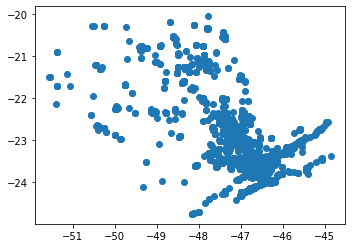

In [ ]:
gdfroubos.plot()

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/SP_Municipios_2021.shp'
dadossp = gpd.read_file(filename)

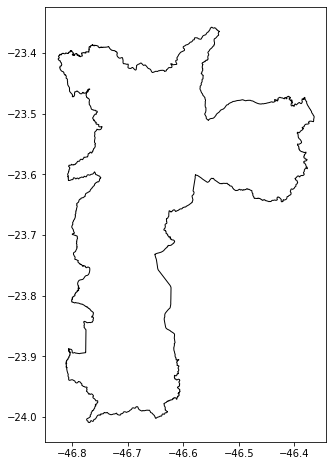

In [ ]:
gdf_sp = dadossp[dadossp['NM_MUN'] == 'São Paulo']
gdf_sp.plot(figsize=(8, 8), facecolor='white', edgecolor='black')

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/sao_paulo.json'

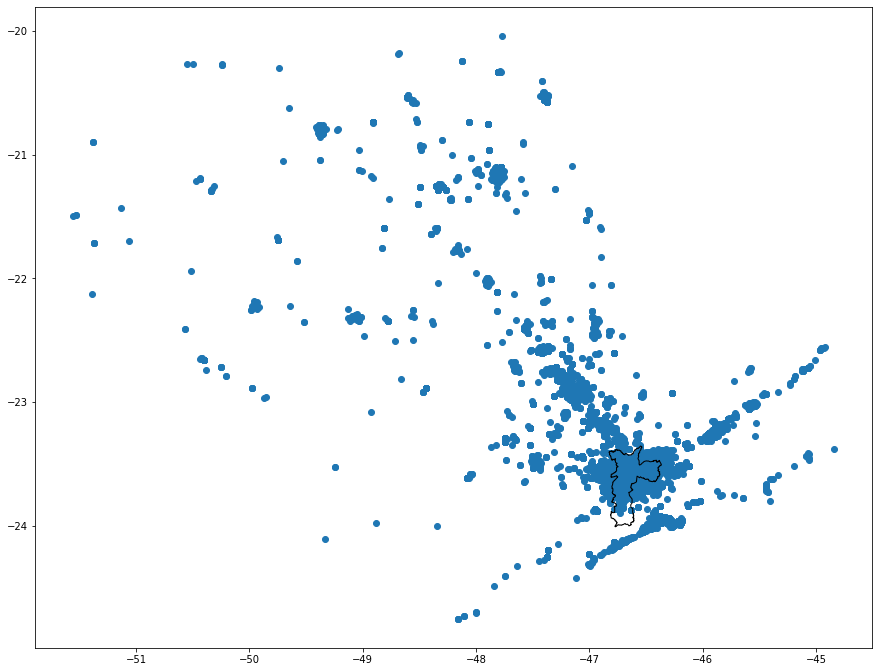

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
gdfroubos.plot(ax=ax)
gdf_sp.plot(ax=ax, facecolor='None', edgecolor='black')

In [ ]:
polysp = gdf_sp.iloc[0].geometry

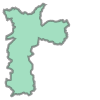

In [ ]:
polysp

In [ ]:
gdfrouboscp = gdfroubos[gdfroubos.intersects(polysp)]


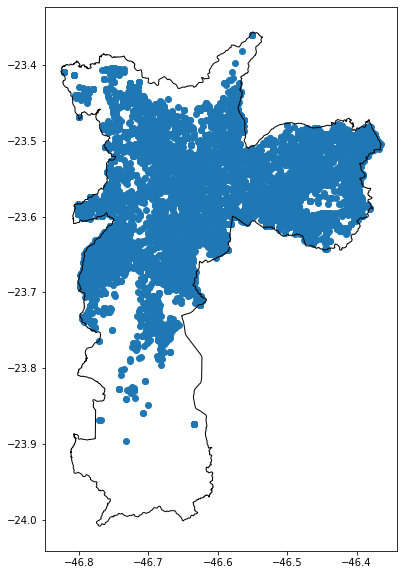

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
gdfrouboscp.plot(ax=ax)
gdf_sp.plot(ax=ax, facecolor='None', edgecolor='black')

Vamos criar os mapas interativos daqui

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
fmap = folium.Map()
fmap

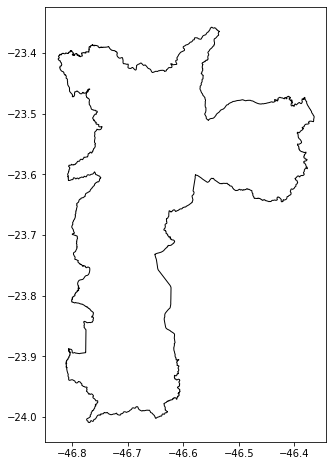

In [ ]:
gdf_sp = dadossp[dadossp['NM_MUN'] == 'São Paulo']
gdf_sp.plot(figsize=(8, 8), facecolor='white', edgecolor='black')

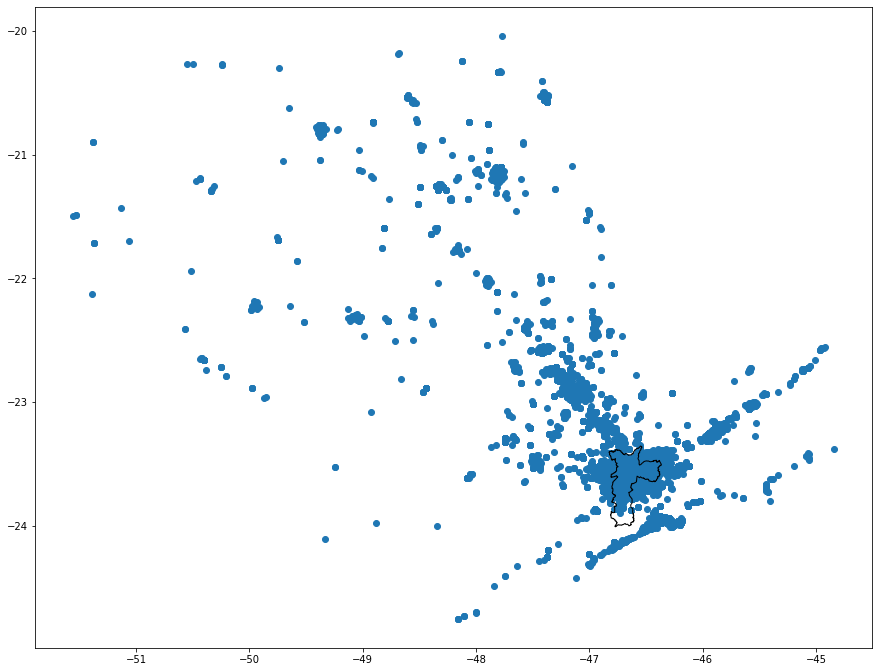

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
gdfroubos.plot(ax=ax)
gdf_sp.plot(ax=ax, facecolor='None', edgecolor='black')

In [ ]:
gdfrouboscp = gdfroubos[gdfroubos.intersects(polysp)]


In [ ]:
gdfrouboscp

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2022,2381,2381/2022,2022-10-01 00:17:11,2022-10-01 00:17:11,2022-09-30,23:30:00,A NOITE,2022-09-30,2022-10-01 00:17:11,...,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple,POINT (-46.72266 -23.66684)
4,2022,134311,134311/2022,2022-10-01 00:27:43,2022-10-01 00:27:43,2022-09-30,18:30:00,A NOITE,2022-09-30,2022-10-01 00:27:43,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.62889 -23.70429)
5,2022,134301,134301/2022,2022-10-01 00:28:16,2022-10-01 00:28:16,2022-09-29,22:20:00,A NOITE,2022-09-30,2022-10-01 00:28:16,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.63109 -23.52679)
6,2022,1710093,1710093/2022,2022-10-01 00:28:14,2022-10-01 00:28:20,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:28:14,...,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,1.0,Outros,POINT (-46.75370 -23.64596)
52,2022,134429,134429/2022,2022-10-01 00:40:01,2022-10-01 00:40:01,2022-09-30,13:13:00,A TARDE,2022-09-30,2022-10-01 00:40:01,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,LG,POINT (-46.57810 -23.54817)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,2022,5785,5785/2022,2022-10-31 23:32:09,2022-10-31 23:32:09,2022-10-31,19:00:00,A NOITE,2022-10-31,2022-10-31 23:32:09,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.48062 -23.55479)
24300,2022,164134,164134/2022,2022-10-31 23:41:44,2022-10-31 23:41:44,2022-10-19,15:00:00,A TARDE,2022-10-31,2022-10-31 23:41:44,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,POINT (-46.64610 -23.55232)
24301,2022,164289,164289/2022,2022-10-31 23:50:31,2022-10-31 23:50:31,2022-10-29,02:30:00,DE MADRUGADA,2022-10-31,2022-10-31 23:50:31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung,POINT (-46.64262 -23.54848)
24302,2022,8247,8247/2022,2022-10-31 23:55:58,2022-10-31 23:55:58,2022-10-31,21:10:00,A NOITE,2022-10-31,2022-10-31 23:55:58,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,POINT (-46.64883 -23.62664)


In [ ]:
dados_roubos = '/content/drive/MyDrive/Colab Notebooks/dados_roubossp.json'

In [ ]:
gdfrouboscp.to_file(dados_roubos, driver='GeoJSON')

ValueError: ignored

In [ ]:
gdfroubossp_slice = gdfrouboscp[:100]
gdfroubossp_slice

In [ ]:
fmap = folium.Map()
feat_geojson = folium.features.GeoJson(gdfroubossp_slice)
fmap.add_child(feat_geojson)
fmap

ValueError: ignored